In [29]:
import numpy as np 
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 

In [3]:
audio_data = np.load('audio_data_4_speeches.npy')
audio_data.shape

(6000, 39)

In [4]:
# bisogna sempre applicare la normalizzazione delle features in fase di training 
scaler = MinMaxScaler()
scaler.fit(audio_data)
audio_data_scaled = scaler.transform(audio_data)

In [5]:
fi_s_test_vec = np.zeros(1500)
se_s_test_vec = np.ones(1500)
th_s_test_vec = np.ones(1500)*2
fo_s_test_vec = np.ones(1500)*3
test_vect = np.concatenate((fi_s_test_vec, se_s_test_vec, th_s_test_vec, fo_s_test_vec))
test_vect.shape

(6000,)

In [6]:
## divide all the dataset for training and for testing (only mfcc??)
X_train, X_test, y_train, y_test = train_test_split(audio_data[:,0:13], test_vect, test_size=0.15, random_state=1)

this is the implementation of the k nearest neighbors, prendo come riferimento non il baricentro di tutte le classi ma un insieme di punti 

In [23]:
dist = 'euclidean'
accuracy_score = []
for k in range(1,101):
    distance_matrix = cdist(X_train, X_test, metric=dist) # compare the distance between each points and all test points
    neighbors = np.argsort(distance_matrix, axis=0) # return the index in incremental order (trainxtest) (index)
    #print(neighbors.shape) 
    K_neighbors = neighbors[:K, :] # take only the first k-th train elements x test values
    #print(K_neighbors.shape)
    neighbors_labels = y_train[K_neighbors]
    prediction = stats.mode(neighbors_labels, axis=0)[0] # find the most frequent label
    # now calculate the accuracy
    accuracy = np.sum(prediction==y_test)/len(y_test)
    accuracy_score.append(accuracy)

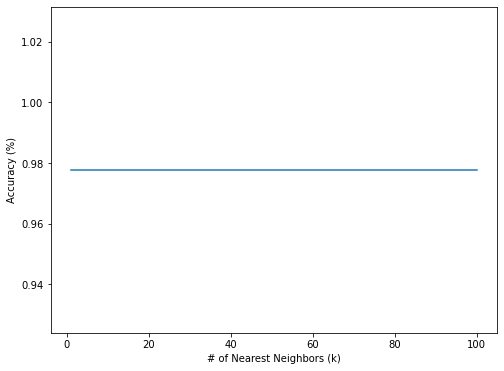

In [24]:
# Plot the results 
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("KNN-dist: euclidean")
ax.plot(range(1,101), accuracy_score)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');

In [30]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9755555555555555


In [25]:
dist = 'cityblock'
accuracy_score = []
for k in range(1,101):
    distance_matrix = cdist(X_train, X_test, metric=dist) # compare the distance between each points and all test points
    neighbors = np.argsort(distance_matrix, axis=0) # return the index in incremental order (trainxtest) (index)
    #print(neighbors.shape) 
    K_neighbors = neighbors[:K, :] # take only the first k-th train elements x test values
    #print(K_neighbors.shape)
    neighbors_labels = y_train[K_neighbors]
    prediction = stats.mode(neighbors_labels, axis=0)[0] # find the most frequent label
    # now calculate the accuracy
    accuracy = np.sum(prediction==y_test)/len(y_test)
    accuracy_score.append(accuracy)

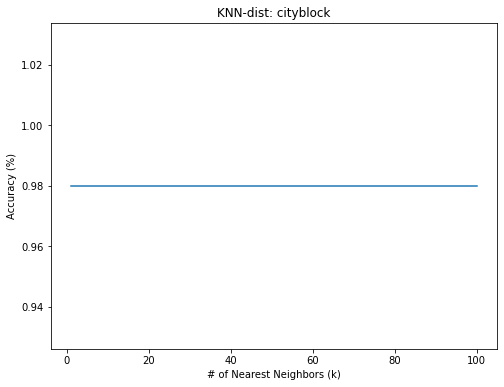

In [26]:
# Plot the results 
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("KNN-dist: cityblock")
ax.plot(range(1,101), accuracy_score)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');

In [27]:
dist = 'cosine'
accuracy_score = []
for k in range(1,101):
    distance_matrix = cdist(X_train, X_test, metric=dist) # compare the distance between each points and all test points
    neighbors = np.argsort(distance_matrix, axis=0) # return the index in incremental order (trainxtest) (index)
    #print(neighbors.shape) 
    K_neighbors = neighbors[:K, :] # take only the first k-th train elements x test values
    #print(K_neighbors.shape)
    neighbors_labels = y_train[K_neighbors]
    prediction = stats.mode(neighbors_labels, axis=0)[0] # find the most frequent label
    # now calculate the accuracy
    accuracy = np.sum(prediction==y_test)/len(y_test)
    accuracy_score.append(accuracy)

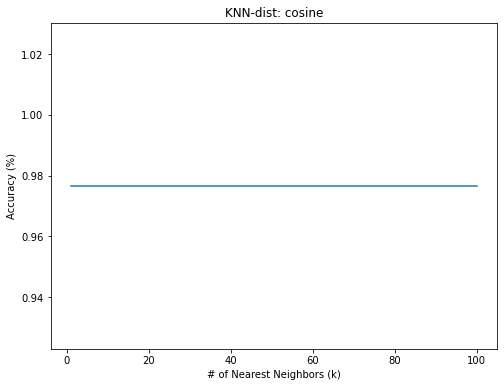

In [28]:
# Plot the results 
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("KNN-dist: cosine")
ax.plot(range(1,101), accuracy_score)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');